In [18]:
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

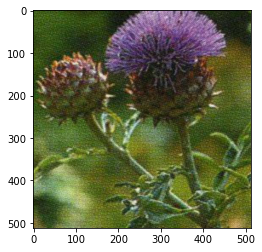

In [19]:
testImage=img.imread('../flowers/artichoke/344.jpeg')
plt.imshow(testImage)

In [20]:
data=[]
label=[]

FlowerPath='../flowers'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (64,64))
            data.append(im)
            
        else: 
             continue

data_arr = np.array(data)
label_arr = np.array(label)
y = LabelEncoder().fit_transform(label_arr)
y = to_categorical(y,106)
X = data_arr/255



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

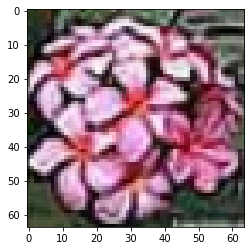

In [22]:
img=plt.imshow(X_train[800])
y_train[800]

In [45]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(106,  activation='softmax'))


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [47]:
truc=model.fit(X_train,y_train,batch_size=32,epochs=3,validation_split=0.3)

Epoch 1/3
224/224 [==============================] - 52s 223ms/step - loss: 3.9687 - accuracy: 0.0962 - val_loss: 3.6853 - val_accuracy: 0.1385
Epoch 2/3
224/224 [==============================] - 48s 215ms/step - loss: 3.4831 - accuracy: 0.1566 - val_loss: 3.4598 - val_accuracy: 0.1496
Epoch 3/3
224/224 [==============================] - 50s 222ms/step - loss: 3.1824 - accuracy: 0.2054 - val_loss: 3.2440 - val_accuracy: 0.1859


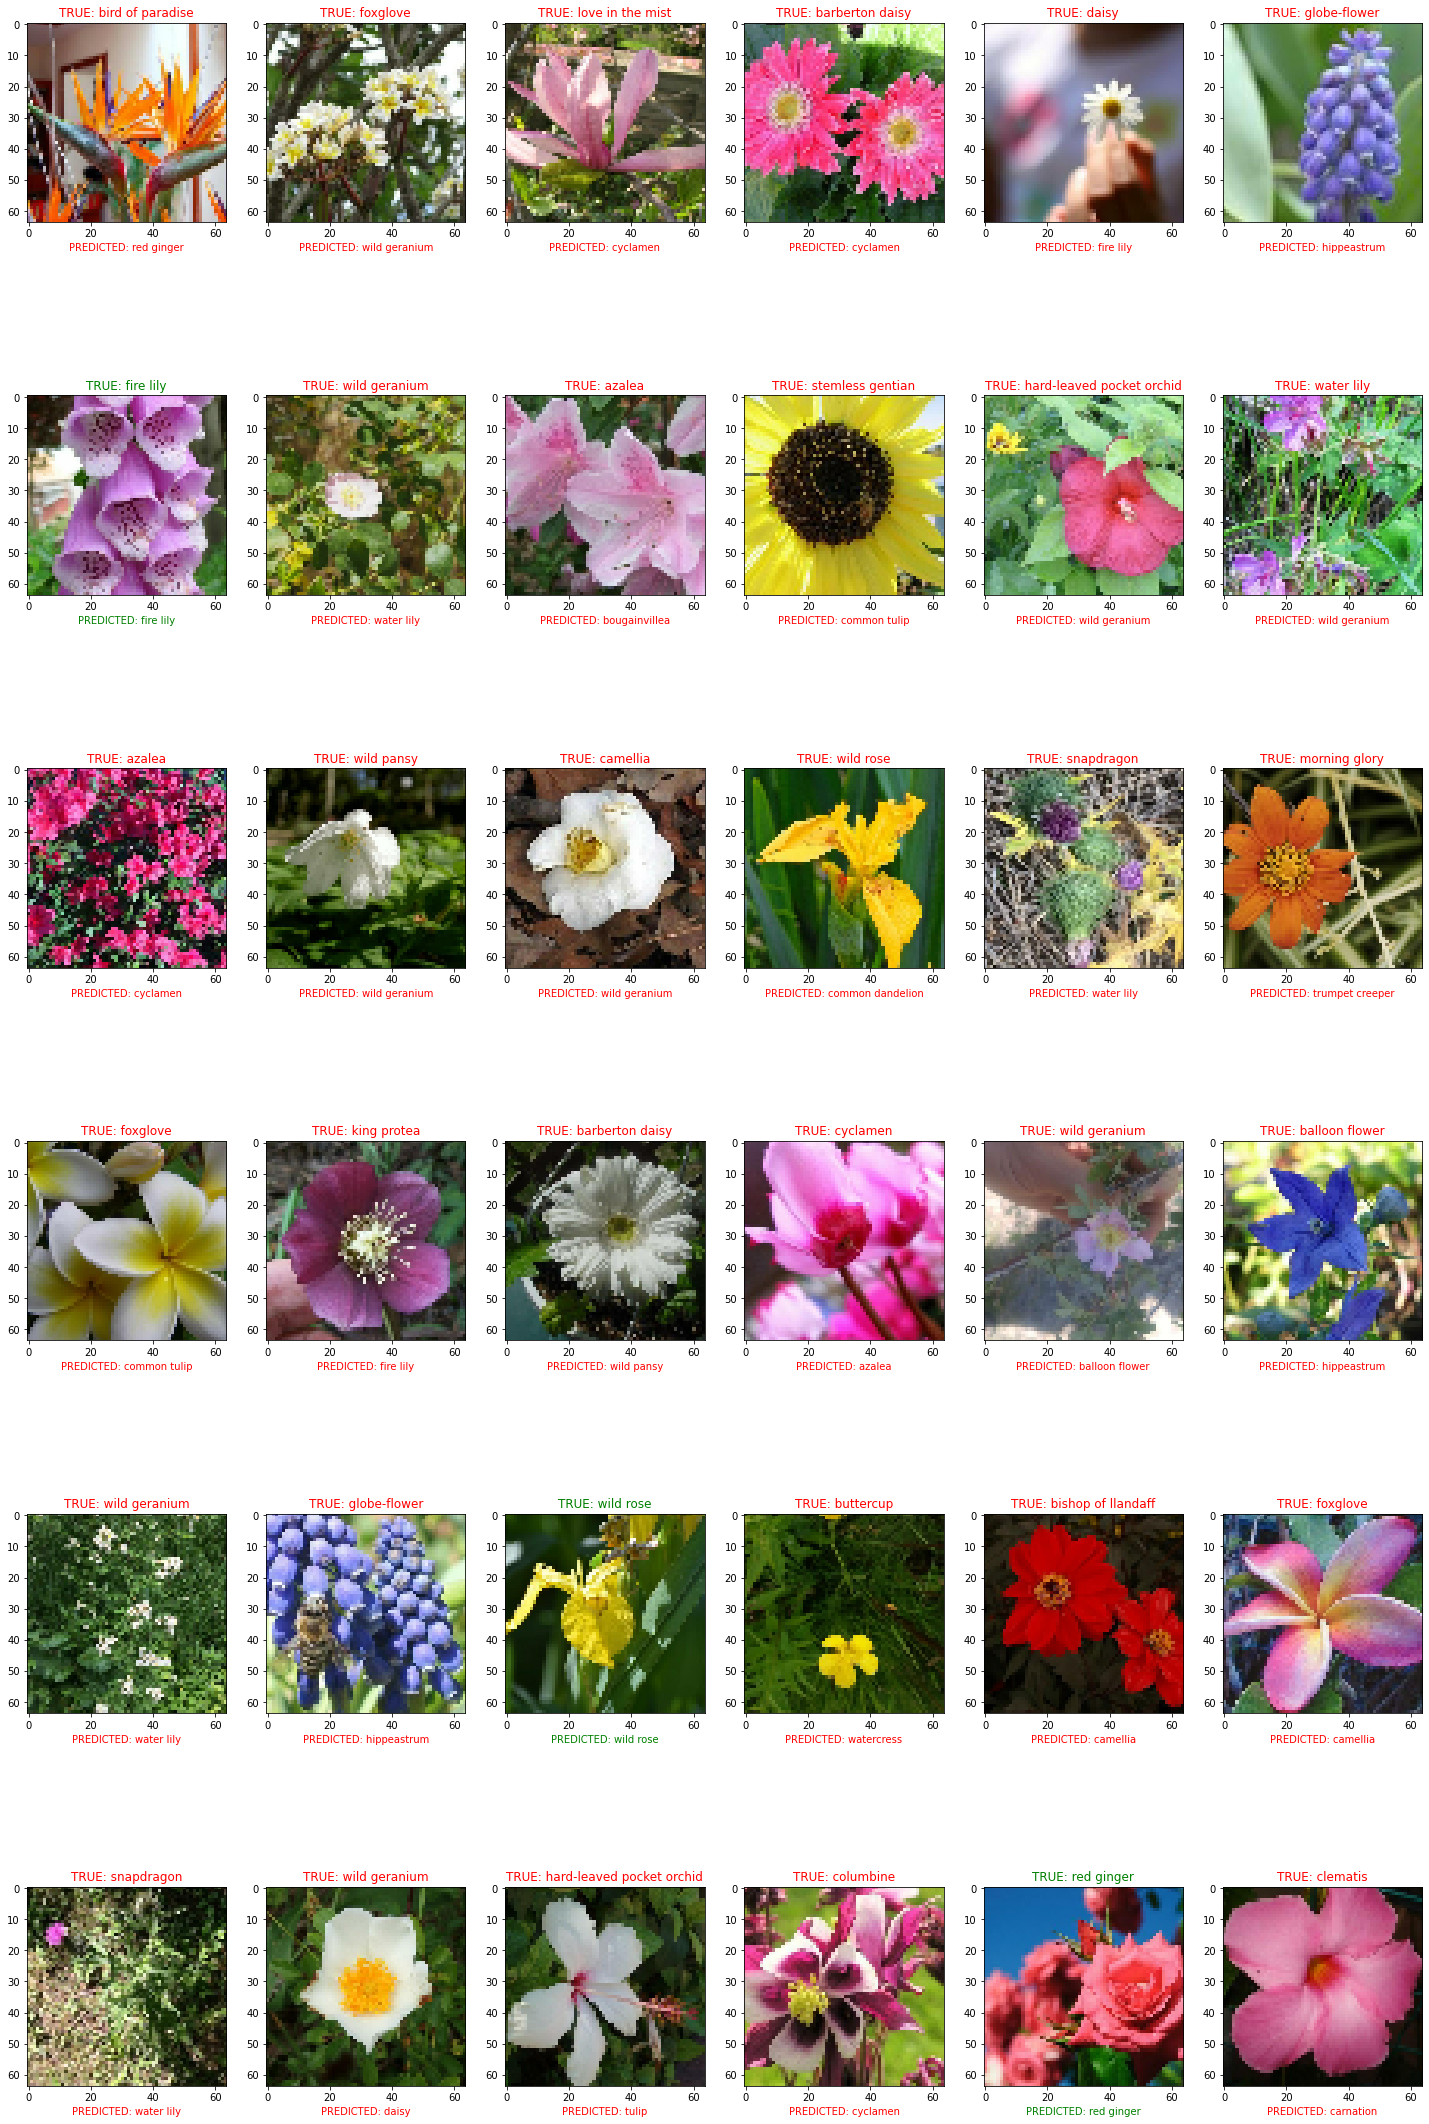

In [48]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(64, 64, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(64, 64, 3), cmap='gray')